# Modelos Ingênuos

In [74]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = "svg"

In [4]:
#leitura dos dados
dados = (pd.read_csv('dataset/dataset_total.csv').set_index('Data').drop(['Consumidores', 'Dias'],axis=1)/1000)[:-36]
val = dados[-36:]
treino = dados[:-36]

In [53]:
#persistência
y_pred_per = np.array([treino.iloc[-1].values]*36).reshape(-1,)
#sazonal
y_pred_sea = np.array([treino.iloc[-12:]]*3).reshape(-1,)

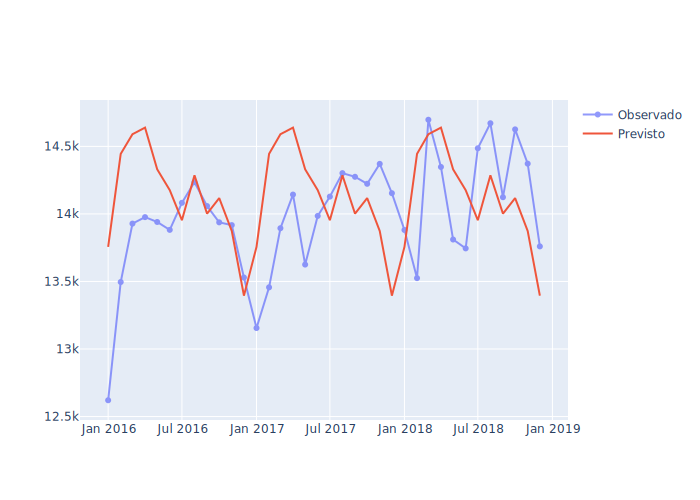

In [84]:
fig = go.Figure()
fig.add_trace(
    go.Scatter(
        mode='lines+markers',
        x = val.index, y=val.values.reshape(-1,),
        opacity=0.7, name='Observado',
        ))
fig.add_trace(
    go.Scatter(
        x =val.index, y=y_pred_sea, 
        opacity=1, name='Previsto',
        ))

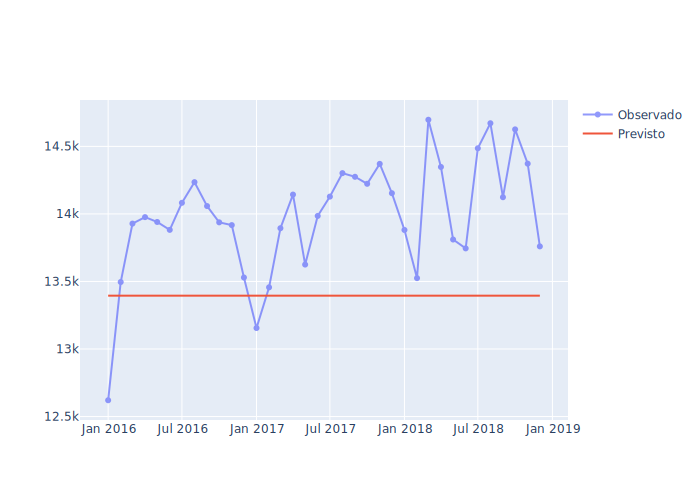

In [85]:
fig = go.Figure()
fig.add_trace(
    go.Scatter(
        mode='lines+markers',
        x = val.index, y=val.values.reshape(-1,),
        opacity=0.7, name='Observado',
        ))
fig.add_trace(
    go.Scatter(
        x =val.index, y=y_pred_per, 
        opacity=1, name='Previsto',
        ))

In [86]:
print('Persistência')
print('RMSE', mean_squared_error(val.values,y_pred_per, squared=False), '\nMAPE', mean_absolute_percentage_error(val.values,y_pred_per)*100)
print('Sazonal')
print('RMSE', mean_squared_error(val.values,y_pred_sea, squared=False), '\nMAPE', mean_absolute_percentage_error(val.values,y_pred_sea)*100)

Persistência
RMSE 720.8093121681513 
MAPE 4.555389145160762
Sazonal
RMSE 511.59730976627816 
MAPE 3.0171888217225185
